In [75]:
import pandas as pd
import numpy as np

import scanpy as sc
#import scFates as scf

#import palantir

#import rpy2

import seaborn as sns

In [2]:
# Load scRNA-seq fibroblast data set with, processed with UMAP embeddings
rna = sc.read_h5ad("../data/rna/scRNA_batch1_2.processed.fibroblasts.h5ad")

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


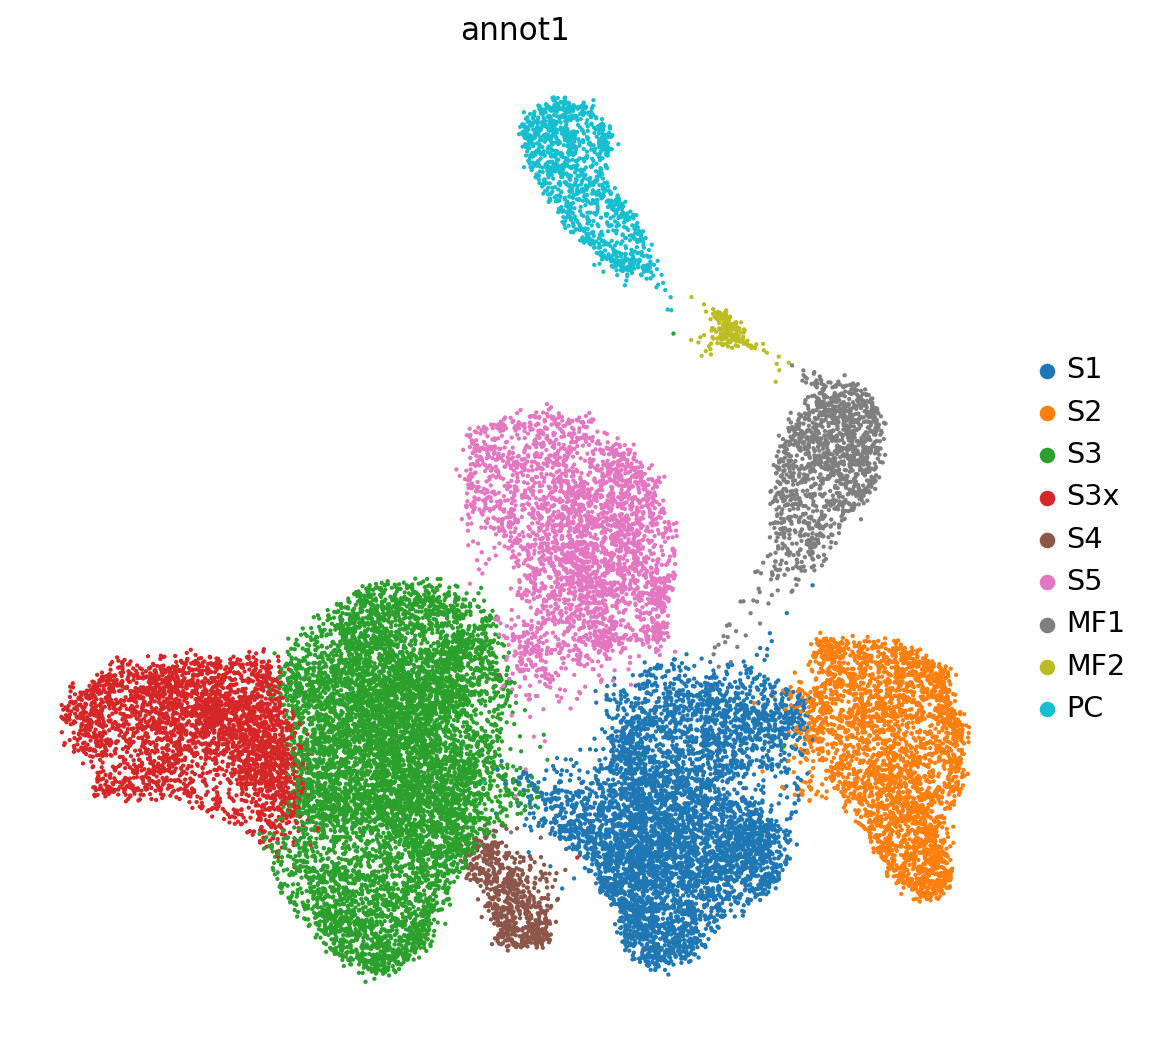

In [3]:
# Set up cell colors and check agreement of UMAP coordinates
sc.set_figure_params(dpi_save=300, figsize=(8, 8))

# without outline
sc.pl.umap(
    rna,
    color='annot1',
    palette='tab10',
    #palette=sc.plotting.palettes.vega_10_scanpy,  # color blind adjusted, vega10 same as tab10?
    frameon=False,
    size=15,  # point size
    #legend_loc='on data',
    #save='UMAP_ATAC_fibroblast_MF_PC.pdf'  # in ./figures
)

In [5]:
sc.tl.paga(rna, groups="annot1")

In [10]:
rna

AnnData object with n_obs × n_vars = 26727 × 17590
    obs: 'doublet_bh_pval', 'n_counts', 'sample_id', 'scrublet_score', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'annot_batch1_lr', 'annot_batch1_lr_prob', 'annot_batch2_lr', 'annot_batch2_lr_prob', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'is_doublet', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'annot1', 'leiden_bk_split4', 'annot_gut_lr', 'annot_gut_lr_prob', 'broad_annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'cc', 'highly_variable', 'highly_variable_nbatches', 'hvg_full'
    uns: 'annot1_colors', 'leiden', 'neighbors', 'neighbors_bk', 'pca', 'umap', 'paga', 'annot1_

In [43]:
rna.uns['paga']

{'connectivities': <9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 72 stored elements in Compressed Sparse Row format>,
 'connectivities_tree': <9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 8 stored elements in Compressed Sparse Row format>,
 'groups': 'annot1',
 'pos': array([[-0.55270242, -0.69205152],
        [-0.89138961,  0.32076711],
        [ 1.12584034, -1.32715522],
        [ 2.00065866, -2.39529559],
        [ 0.16820991, -1.63802382],
        [ 0.29085713, -0.81987718],
        [ 0.54193288,  1.05030316],
        [ 1.26221982,  0.6276436 ],
        [ 0.81279254,  0.10590744]])}

# Heatmap of PAGA connectivities

In [91]:
#rna.uns['paga']['connectivities']

In [76]:
# get matrix of PAGA connectivitites
mat = pd.DataFrame.sparse.from_spmatrix(rna.uns['paga']['connectivities'])

mat.index = rna.obs.annot1.cat.categories
mat.columns = rna.obs.annot1.cat.categories

mask = np.triu(mat)

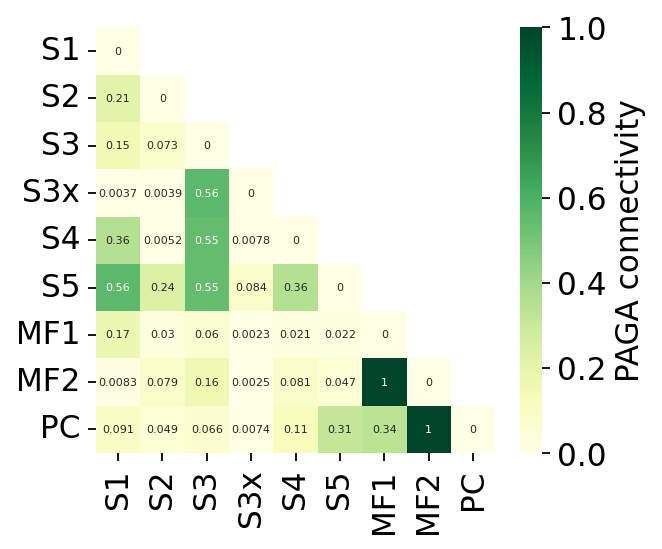

In [183]:
plot = sns.heatmap(
    mat,
    annot=True,
    annot_kws={"fontsize": 5},
    mask=mask,
    cmap='YlGn',
    cbar_kws={'label': 'PAGA connectivity'}
)

plot.get_figure().savefig('figures/paga_connectivity_heatmap.pdf', bbox_inches='tight')

# PAGA graph

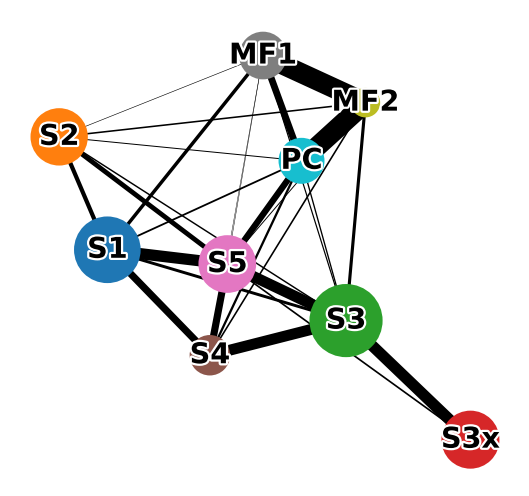

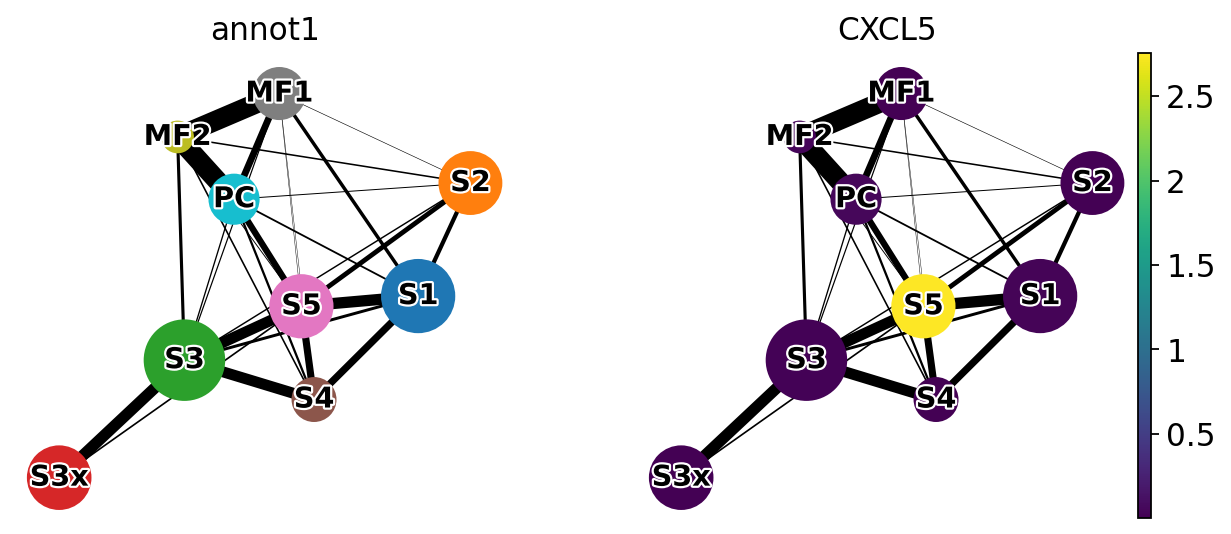

In [179]:
sc.set_figure_params(figsize=(4, 3.5))
sc.pl.paga(
    rna,
#    threshold=0.05,
    color=["annot1"],
    frameon=False,
    fontoutline=2,
    node_size_scale=4,
    edge_width_scale=1.2,
)

# Flip x-axis, based on initial position of previous layoyt
rna.uns['paga']['pos'][:,0] = -rna.uns['paga']['pos'][:,0]

sc.pl.paga(
    rna,
#    threshold=0.05,
    color=["annot1", "CXCL5"],
    frameon=False,
    fontoutline=2,
    node_size_scale=5,
    edge_width_scale=1.2,
    init_pos=rna.uns['paga']['pos'],
    save="_connectivity_graph.pdf"
)


# Reembed neighbor graph using PAGA initialization

In [99]:
# ForceAtlas2 layout 
sc.tl.draw_graph(rna, init_pos='paga')

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


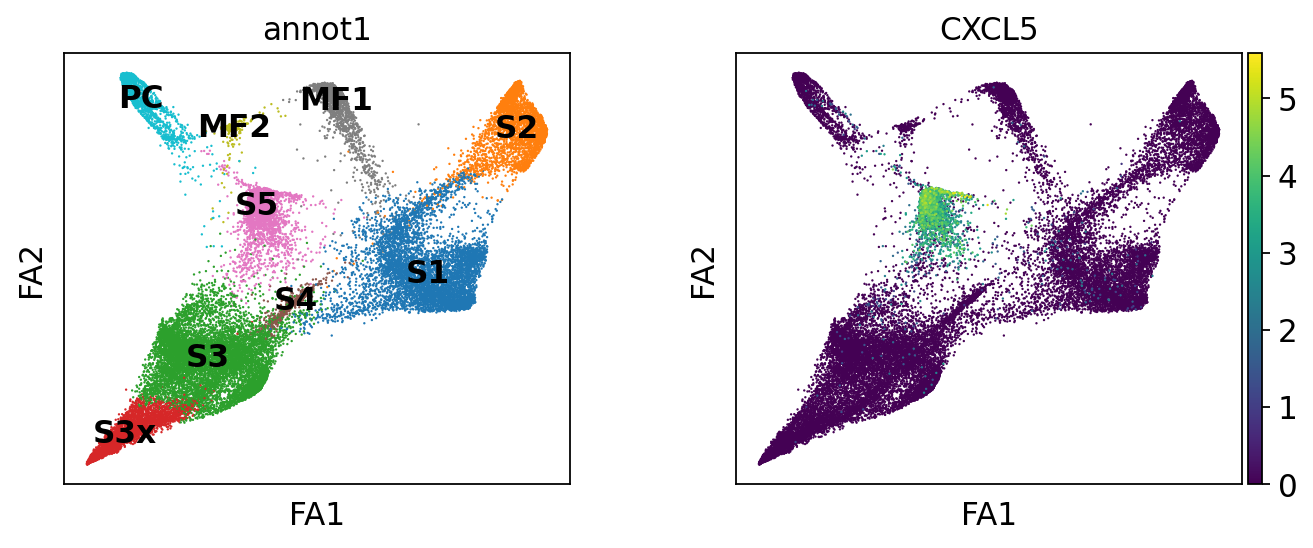

In [184]:
sc.set_figure_params(figsize=(4, 3.7))

sc.pl.draw_graph(
    rna,
    color=["annot1", "CXCL5"],
    legend_loc="on data",
    save="PAGA_reembed_forceatlas2.pdf"
)

In [129]:
# Root pseudotime for S5
rna.uns["iroot"] = np.flatnonzero(rna.obs["annot1"] == "S5")[10]

In [130]:
sc.tl.dpt(rna)

In [135]:
# Flip pseudotime, emmanating from S5
rna.obs.dpt_pseudotime = 1 - rna.obs.dpt_pseudotime

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


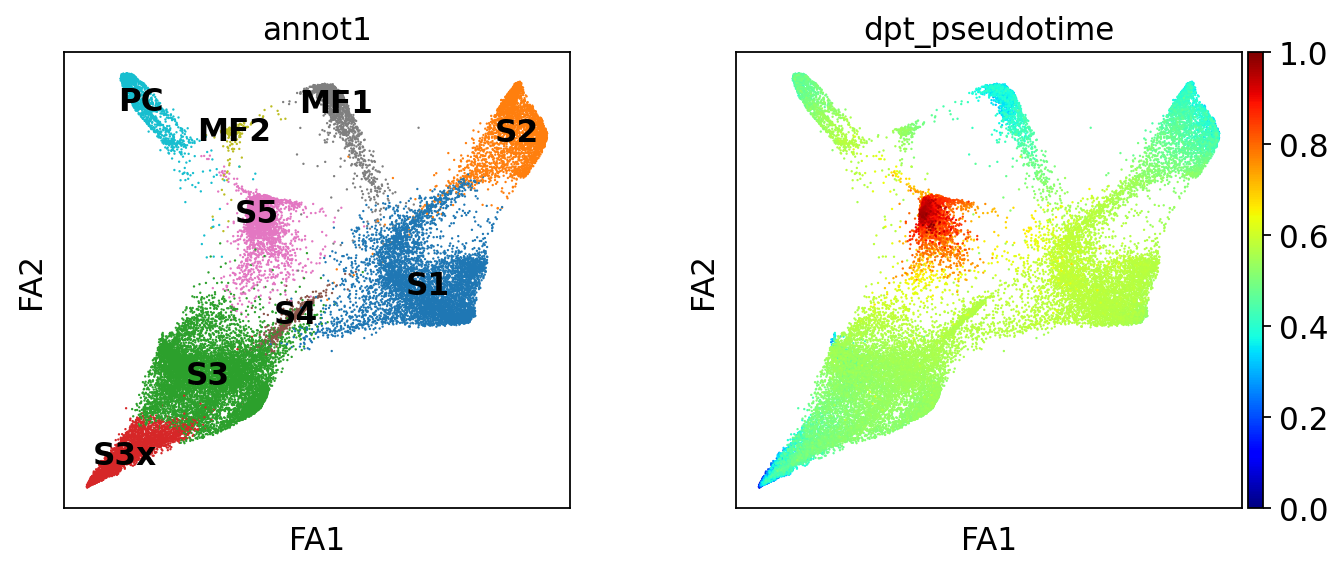

In [185]:
sc.set_figure_params(figsize=(4, 3.7))

sc.pl.draw_graph(rna, color=["annot1", "dpt_pseudotime"], legend_loc="on data", cmap='jet',
 save='PAGA_reembed_pseudotime.pdf')

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1228: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1277: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)


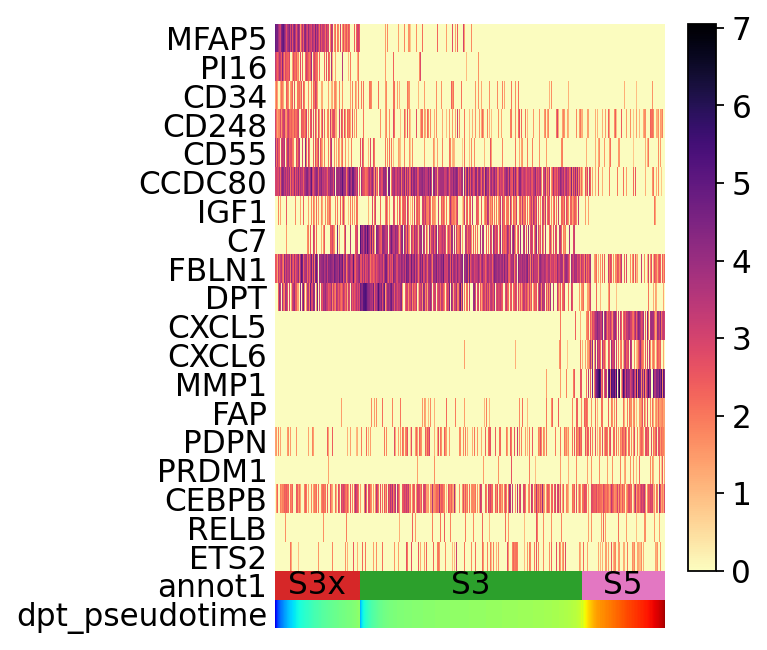

In [174]:
sc.set_figure_params(figsize=(4, 4.5))

genes = [
    'MFAP5', 'PI16', 'CD34', 'CD248', 'CD55',  # S3x
    'CCDC80', 'IGF1', 'C7', 'FBLN1', 'DPT',  # S3
    'CXCL5', 'CXCL6', 'MMP1', 'FAP', 'PDPN',  # S5
    'PRDM1', 'CEBPB', 'RELB', 'ETS2'  # S5 TFs
]
path = ['S3x', 'S3', 'S5']

sc.pl.paga_path(
    rna,
    nodes=path,
    keys=genes,
    color_map='magma_r',
    color_maps_annotations={"dpt_pseudotime": "jet"},
    save=''.join(path) + '.pdf'
)

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1228: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1277: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)


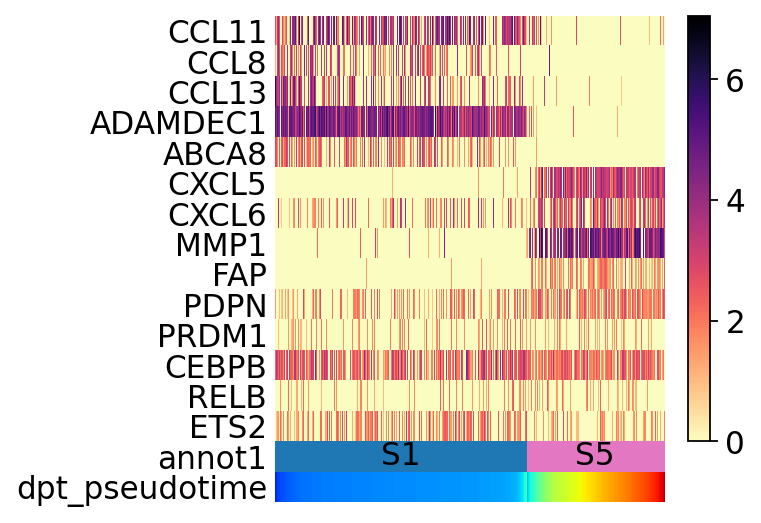

In [175]:
sc.set_figure_params(figsize=(4, 3.5))

genes = [
    'CCL11', 'CCL8', 'CCL13', 'ADAMDEC1', 'ABCA8',
    'CXCL5', 'CXCL6', 'MMP1', 'FAP', 'PDPN',  # S5
    'PRDM1', 'CEBPB', 'RELB', 'ETS2'  # S5 TFs
]
path = ['S1', 'S5']

sc.pl.paga_path(
    rna,
    nodes=path,
    keys=genes,
    color_map='magma_r',
    color_maps_annotations={"dpt_pseudotime": "jet"},
    save=''.join(path) + '.pdf'
)

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1228: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1277: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)


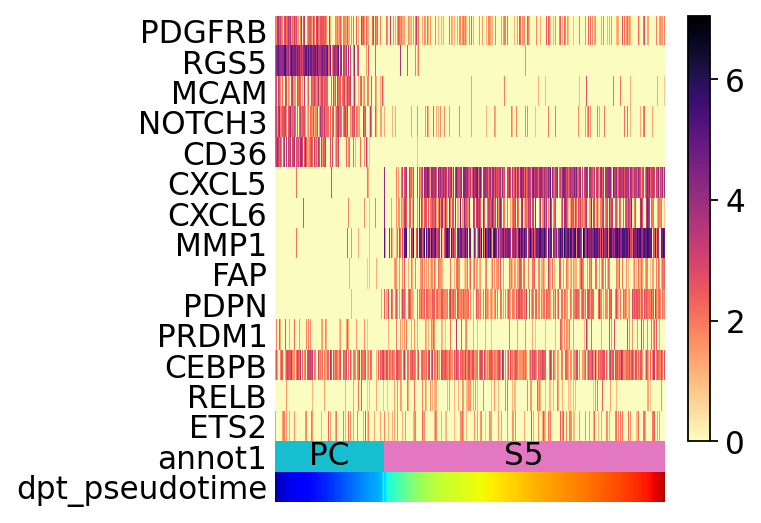

In [176]:
sc.set_figure_params(figsize=(4, 3.5))


genes = [
    'PDGFRB', 'RGS5', 'MCAM', 'NOTCH3', 'CD36',
    'CXCL5', 'CXCL6', 'MMP1', 'FAP', 'PDPN',  # S5
    'PRDM1', 'CEBPB', 'RELB', 'ETS2'  # S5 TFs
]
path = ['PC', 'S5']

sc.pl.paga_path(
    rna,
    nodes=path,
    keys=genes,
    color_map='magma_r',
    color_maps_annotations={"dpt_pseudotime": "jet"},
    save=''.join(path) + '.pdf'
)